In [1]:
# ATMS 305, Fall 2024 -- Lab05: Python Mapping with Cartopy
# History:
#    Mapping in Python previously used a package called Basemap.
#    Today most use cartopy, developed at the UK Met Office.
#    It has many applications, some of which produce very detailed maps.
# Here are some information links for Cartopy:
#    https://scitools.org.uk/cartopy/docs/latest/index.html
#    https://github.com/SciTools/cartopy
#    https://pypi.org/project/Cartopy/
#    https://waterhackweek.github.io/visualization/04-geopandas-and-cartopy/
#    https://towardsdatascience.com/plotting-geospatial-data-with-cartopy-4b5ad0da0761
#    https://foundations.projectpythia.org/core/cartopy/cartopy.html
#
# For the latest on Cartopy development and fixes:
#    https://github.com/SciTools/cartopy/issues
#    https://stackoverflow.com/questions/tagged/cartopy

In [25]:
# GIVEN: Install cartopy, and import matplotlib & cartopy
#!pip install cartopy
import matplotlib.pyplot as plt
import cartopy.feature as cfeature
import cartopy.crs as ccrs
import pandas as pd

In [3]:
# Map projections take a region on our not-quite-spherical Earth and place
# them in a 2D space.  Distortions are inevitable, so there are many
# approaches to achieve particular goals including maps that preserve
# quantities such as angles, distances and areas.  For more on projections:
#    Wikipedia  : https://en.wikipedia.org/wiki/Map_projection
#    Explanation: https://gisgeography.com/map-projections/
#    Many types : https://gisgeography.com/map-projection-types/

<h1>Examples of map projection surfaces</h1>
In each, a portion of the Earth is next to or inside the grey surface, and is projected onto it.  This grey surface (an "image plane" for the azimuthal case) becomes your map when scaled down to the size of your screen.
<p>
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/c/c1/Comparison_of_cartography_surface_development.svg/640px-Comparison_of_cartography_surface_development.svg.png"/>
<br><font size="-2">From Wikipedia at https://commons.wikimedia.org/wiki/File:Comparison_of_cartography_surface_development.svg


In [4]:
# Once we have a projection, we often add "features" to the map.
# 1. Some features are from Natural Earth: https://www.naturalearthdata.com
# 2. More: https://scitools.org.uk/cartopy/docs/latest/matplotlib/feature_interface.html
# 3. And: https://scitools.org.uk/cartopy/docs/v0.15/matplotlib/feature_interface.html

Text(0.5, 1.0, 'Mollweide')

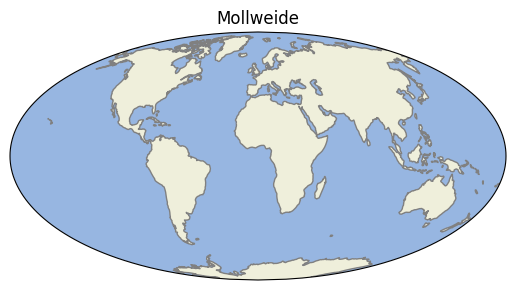

In [8]:
# >> A: MOLLWEIDE projection: Global
# This is an equal area projection.  Equal area projections distort shape
#   and angles, and are not conformal.  The earth is a 2:1 ellipse here.
# Mollweide is used widely for global maps of the world or night sky.
#   It is "pseudocylindrical"; the equator is a straight horizontal line.
# On this map, meridians (N-S lines: constant longitude) are equally
#   spaced at the equator, but bunched up near the poles.
# Options include: central_longitude
# References:
#    Mollweide: https://en.wikipedia.org/wiki/Mollweide_projection
#    Conformal maps - https://en.wikipedia.org/wiki/Conformal_map_projection
#    Features - https://scitools.org.uk/cartopy/docs/latest/matplotlib/feature_interface.html
# Uncomment and run the following.

ax = plt.axes(projection=ccrs.Mollweide())
ax.add_feature(cfeature.LAND);  # Add land
ax.add_feature(cfeature.OCEAN); # Add oceans
ax.coastlines(color='gray', resolution='110m'); # Coastlines at 1:110 million scale
ax.set_title('Mollweide')

Text(0.5, 1.0, 'Stock image on Mollweide')

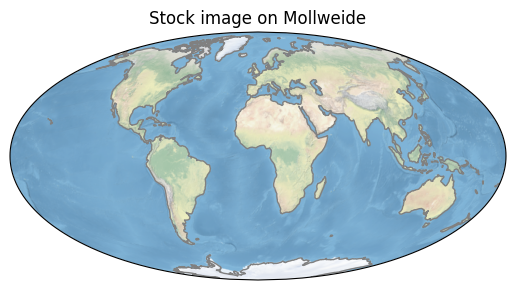

In [7]:
# >> B: MOLLWEIDE with STOCK IMAGE
# Let's repeat the last map, but with a "stock image".
# 1. Start a Mollweide map
# 2. Don't add LAND or OCEAN
# 3. Add the line "ax.stock_img()" for the stock image
# 4. Add coastlines as before
# 5. Add title: Stock image on Mollweide
ax = plt.axes(projection=ccrs.Mollweide())
ax.stock_img()
ax.coastlines(color='gray', resolution='110m'); # Coastlines at 1:110 million scale
ax.set_title('Stock image on Mollweide')

Text(0.5, 1.0, 'Mercator')

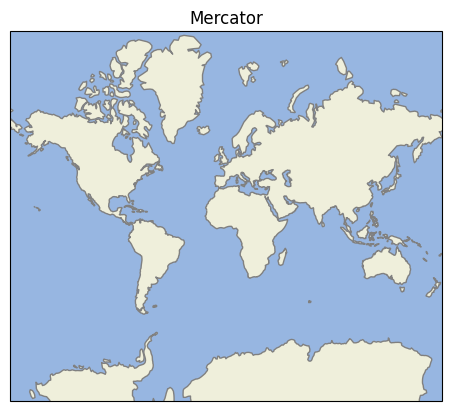

In [9]:
# >> C: MERCATOR projection - global
# Mercator is a cylindrical projection, which wraps the globe around a
#   cylinder.  Mercator shows true directions well, but these maps are
#   not equal area or equidistant, and the Arctic/Antarctic are distorted.
# Mercator is used for navigation or maps of equatorial regions.
# Options include: central_longitude, min_latitude, max_latitude
# References:
#   Cylindrical projections: https://gisgeography.com/cylindrical-projection/
#   Mercator: https://www.wired.com/2013/07/projection-mercator/
#
# 1. Do as in "A" but with projection ccrs.Mercator()
# 2. Add title "Mercator"
ax = plt.axes(projection=ccrs.Mercator())
ax.add_feature(cfeature.LAND);  # Add land
ax.add_feature(cfeature.OCEAN); # Add oceans
ax.coastlines(color='gray', resolution='110m'); # Coastlines at 1:110 million scale
ax.set_title('Mercator')

Text(0.5, 1.0, 'PlateCarree')

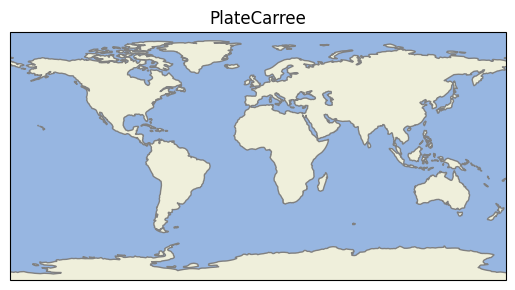

In [10]:
# >> D: PLATECARREE projection - global
# PlateCarree is an equirectangular projection, which maps
#   meridians (N-S lines: constant longitude) to straight lines,
#   and parallels (circles of latitude) to lines of constant spacing.
# It is neither equal area nor conformal, and has considerable distortion,
#   but is frequently used for some global data sets.
# Options include: central_longitude
# References:
#   PlateCarree: https://en.wikipedia.org/wiki/Equirectangular_projection
#   Cylindrical projections: https://gisgeography.com/cylindrical-projection/
# 1. Start a figure with projection ccrs.PlateCarree()
# 2. Add title "PlateCarree"

ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(cfeature.LAND);  # Add land
ax.add_feature(cfeature.OCEAN); # Add oceans
ax.coastlines(color='gray', resolution='110m'); # Coastlines at 1:110 million scale
ax.set_title('PlateCarree')

Text(0.5, 1.0, 'Africa')

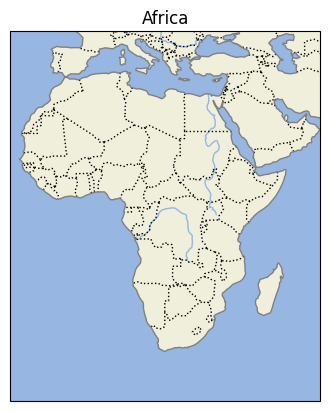

In [18]:
# >> E: ZOOMED PLATECARREE: AFRICA
# 1. Start a figure with projection ccrs.PlateCarree()
# 2. Add LAND and OCEAN
# 3. Again do ax.add_feature, but this time with: cfeature.LAKES, alpha=0.5
# 4. add_feature again with: cfeatures.RIVERS
# 5. add cfeature.BORDERS, linestyle=':' (gives dotted lines)
# 6. Add coastlines as before
# 7. Change region to 20W to 60E longitude, and 40S to 40N
#    latitude, with: ax.set_extent([-20, 60, -40, 40]);
#    Info: https://foundations.projectpythia.org/core/cartopy/cartopy.html#cartopys-set-extent-method
# 8. Add title "Africa"

ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(cfeature.LAND);  # Add land
ax.add_feature(cfeature.OCEAN); # Add oceans
ax.add_feature(cfeature.RIVERS)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.coastlines(color='gray', resolution='110m'); # Coastlines at 1:110 million scale
ax.set_extent([-20, 60, -40, 40])
ax.set_title('Africa')

Text(0.5, 1.0, 'US Albers projection at 1:110,000,000')

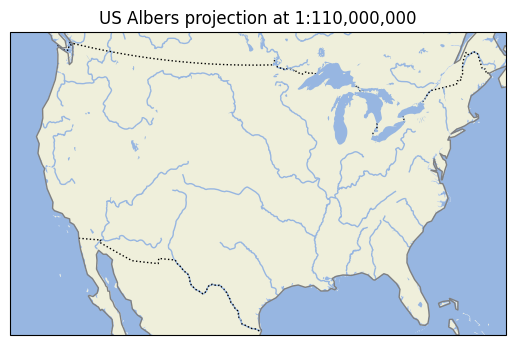

In [17]:
# >> F: ALBERS EQUAL AREA projection - U.S., default resolution:
# Albers is an equal area map projection with two standard parallels,
#    used for showing large countres with map areas proportional to Earth areas.
# Albers is used by the USGS and US Census Bureau.
# Options include: central_longitude, central_latitude, standard_parallels
# Conic projections: https://gisgeography.com/conic-projection-lambert-albers-polyconic/
#
# 1. Start an Albers Equal Area map centered on 98 West longitude, 37.5 N latitude,
#    with: ccrs.AlbersEqualArea(-98,37.5)
# 2. Add LAND, OCEAN, RIVERS, BORDERS as before
# 3. Add LAKES, alpha=1
# 4. Add coastlines as before
# 5. Choose a map extent from 122 to 73 W longitude, 23 to 50 N latitude
# 6. Add title: US Albers projection at 1:110,000,000
ax = plt.axes(projection=ccrs.AlbersEqualArea(-98,37.5))
ax.add_feature(cfeature.LAND);  # Add land
ax.add_feature(cfeature.OCEAN); # Add oceans
ax.add_feature(cfeature.RIVERS)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAKES, alpha=1)

ax.coastlines(color='gray', resolution='110m'); # Coastlines at 1:110 million scale
ax.set_extent([-122, -73, 23, 50])
ax.set_title('US Albers projection at 1:110,000,000')

Text(0.5, 1.0, 'US states at 1:50,000,000')

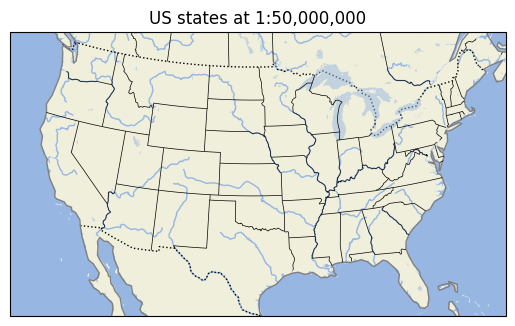

In [14]:
# >> G: LAMBERT CONFORMAL PROJECTION, 1:50m w/states
#
# 1. Start a ccrs.LambertConformal() map centered again at
#      98 West longitude, 37.5 N latitude
# 2. Add LAND, OCEAN, RIVERS, BORDERS as before, + LAKES (alpha=0.5)
# 3. Add coastlines as before
# 4. Define states_provinces with this code (uncomment and use it):
#      states_provinces = cfeature.NaturalEarthFeature(
#            category='cultural',  name='admin_1_states_provinces_lines',
#           scale='50m', linewidth=0.5, facecolor='none')
# 5. ADD states_provinces with this line (uncomment and use it):
#      ax.add_feature(states_provinces, edgecolor='black', zorder=10)
# 6. Set extent as before
# 7. Add title: US states at 1:50,000,000
ax = plt.axes(projection=ccrs.LambertConformal(-98,37.5))
ax.add_feature(cfeature.LAND);  # Add land
ax.add_feature(cfeature.OCEAN); # Add oceans
ax.add_feature(cfeature.RIVERS)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAKES, alpha=0.5)
ax.coastlines(color='gray', resolution='110m'); # Coastlines at 1:110 million scale\

states_provinces = cfeature.NaturalEarthFeature(category='cultural', name='admin_1_states_provinces_lines', scale='50m', linewidth=0.5, facecolor='none')
ax.add_feature(states_provinces, edgecolor='black', zorder=10)

ax.set_extent([-122, -73, 23, 50])
ax.set_title('US states at 1:50,000,000')

Text(0.5, 1.0, 'Midwest')

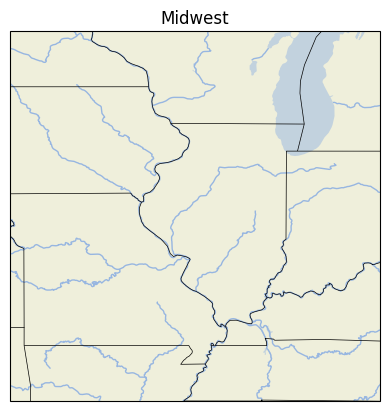

In [16]:
# >> H: MIDWEST ZOOMED PROJECTION
# 1. Start a ccrs.PlateCarree() projection, center value not necessary
# 2. Add LAND, OCEAN, LAKES, RIVERS, BORDERS as before
# 3. Add coastlines as before
# 4. Add states/provinces as before (two statements: define, then add)
# 5. Set extent from 95 to 85 W longitude, 35 to 45 N latitude
# 6. Add title: Midwest

ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(cfeature.LAND);  # Add land
ax.add_feature(cfeature.OCEAN); # Add oceans
ax.add_feature(cfeature.RIVERS)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAKES, alpha=0.5)
ax.coastlines(color='gray', resolution='110m'); # Coastlines at 1:110 million scale

states_provinces = cfeature.NaturalEarthFeature(category='cultural', name='admin_1_states_provinces_lines', scale='50m', linewidth=0.5, facecolor='none')
ax.add_feature(states_provinces, edgecolor='black', zorder=10)

ax.set_extent([-95, -85, 35, 45])
ax.set_title('Midwest')

Text(0.5, 1.0, 'Chicago')

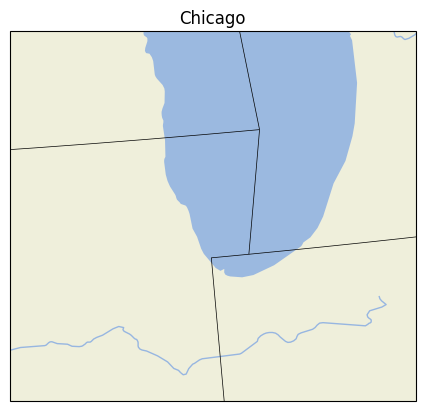

In [20]:
# >> I: ZOOMED PROJECTION: CHICAGO
# 1. Start a ccrs.LambertConformal() projection, center value not necessary
# 2. Add LAND, OCEAN, LAKES, RIVERS, BORDERS as before, but: I used alpha=0.95
# 3. Add states/provinces as before
# 4. Add coastlines as before
# 5. Set extent from 89 to 86 W longitude, 41 to 43 N latitude
# 6. Add title: Chicago

ax = plt.axes(projection=ccrs.LambertConformal())
ax.add_feature(cfeature.LAND);  # Add land
ax.add_feature(cfeature.OCEAN); # Add oceans
ax.add_feature(cfeature.RIVERS)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAKES, alpha=0.95)
ax.coastlines(color='gray', resolution='110m'); # Coastlines at 1:110 million scale

states_provinces = cfeature.NaturalEarthFeature(category='cultural', name='admin_1_states_provinces_lines', scale='50m', linewidth=0.5, facecolor='none')
ax.add_feature(states_provinces, edgecolor='black', zorder=10)

ax.set_extent([-89, -86, 41, 43])
ax.set_title('Chicago')

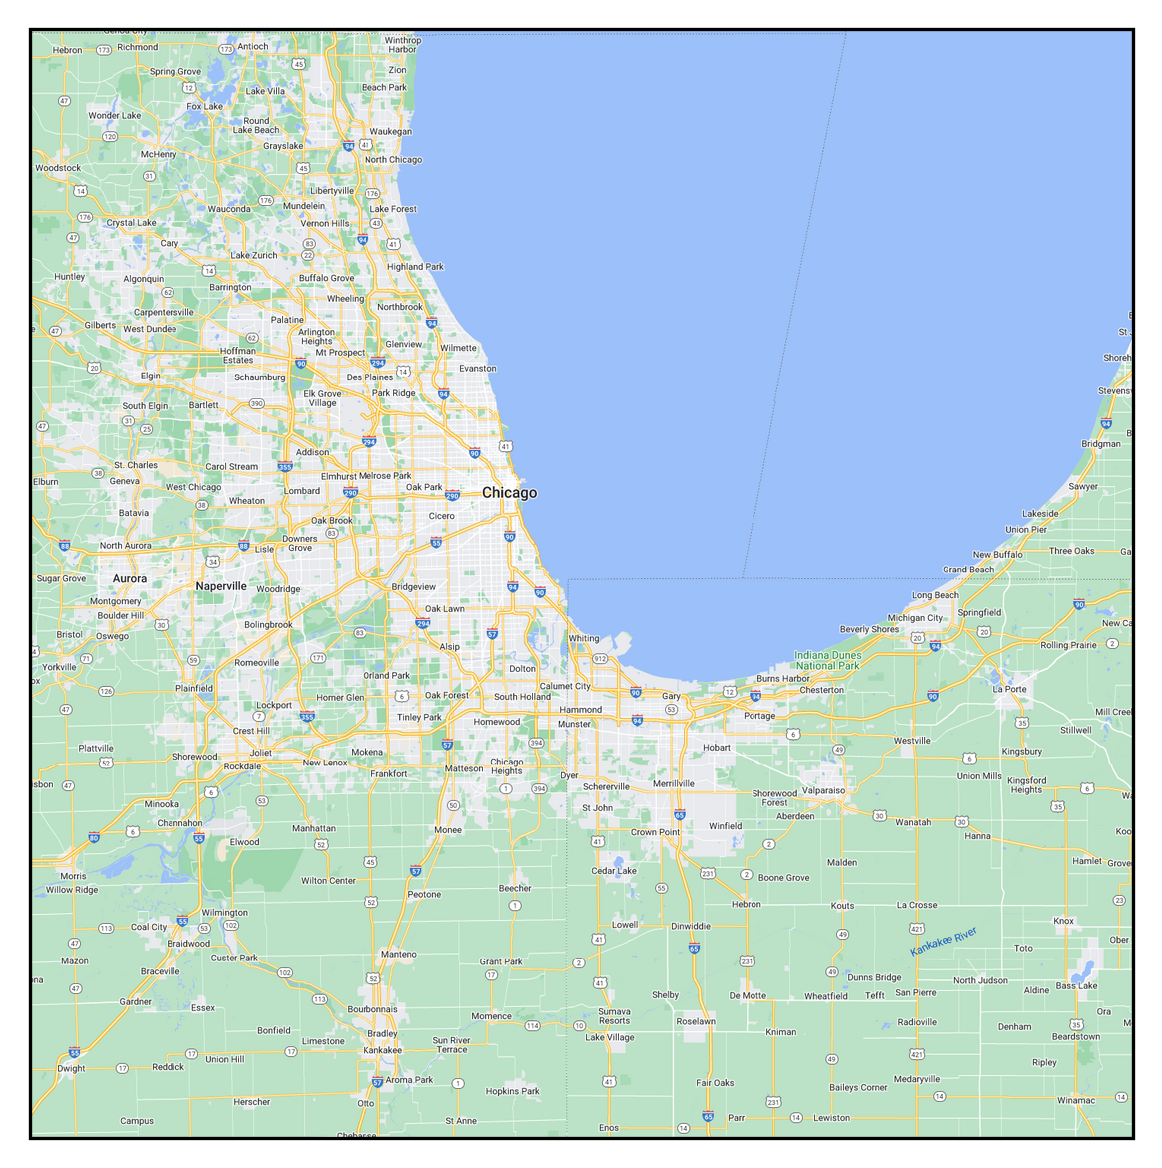

In [21]:
# >> J: CHICAGO DETAIL
# Uncomment and run the following.

from cartopy.io import shapereader

def make_map(projection=ccrs.PlateCarree()):
  fig, ax = plt.subplots(dpi=300,subplot_kw=dict(projection=projection))
  return fig, ax

import cartopy.io.img_tiles as cimgt
extent = [-88.5, -86.5, 41, 42.5]

request = cimgt.GoogleTiles()

fig, ax = make_map(projection=request.crs)
ax.set_extent(extent)

ax.add_image(request, 10, interpolation='spline36')

Text(0.5, 1.0, 'K: Chicago to London')

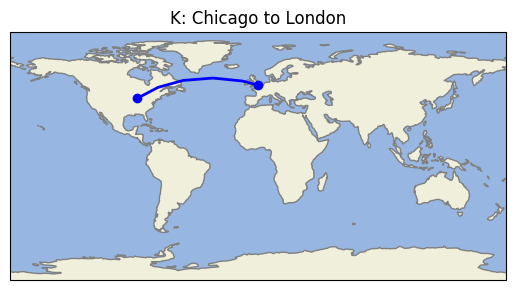

In [22]:
# >> K: GREAT CIRCLE ROUTE: CHICAGO to LONDON
# 1. Start a ccrs.PlateCarree() projection
# 2. Add LAND and OCEAN
# 3. Set for a global projection with: ax.set_global()
# 4. Add coastlines as before
# 5. Set/define the following variables: ChicagoLon, ChicagoLat,
#      LondonLon, LondonLat (look up lat/lon of both cities)
#      Remember Chicago's longitude will be negative (west)
# 6. Now do this ax.plot statement:
#      ax.plot( [ChicagoLon, LondonLon], [ChicagoLat, LondonLat] )
# 7. Add the following options inside the ax.plot() --
#       color='blue'
#       linewidth=2
#       marker='o'
#       transform=ccrs.Geodetic()
# 8. Add title: 'K: Chicago to London'

ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(cfeature.LAND);  # Add land
ax.add_feature(cfeature.OCEAN); # Add oceans
ax.set_global()
ax.coastlines(color='gray', resolution='110m'); # Coastlines at 1:110 million scale

ChicagoLon, ChicagoLat = -87.6298, 41.8781
LondonLon, LondonLat = -0.1276, 51.5072

ax.plot([ChicagoLon, LondonLon], [ChicagoLat, LondonLat], color='blue', linewidth=2, marker='o', transform=ccrs.Geodetic())
ax.set_title('K: Chicago to London')

In [27]:
# >> L: GET and read data for 7.0+ quakes since *2001*
# 1. Get the file: rfd.atmos.uiuc.edu/305/quakeLab05.csv
# 2. import pandas (as pd) if you haven't already
# 3. Read the data with pd.read_csv into object named 'quake'
#      i.e. quake = pd.read .....
# 4. Set the data set name with: quake.name = 'Quake Data'
# 5. Use the object name (quake) + .head() to see some of the contents.
#      For pandas: .head() is beginning of file,
#                  .tail() is bottom / end of file,
#                  .describe() summarizes the data.
# NOTES: it should say "5 rows x 22 columns" at bottom
#   The index values are bold black on the left side 0 ... 4
#   Field info: https://earthquake.usgs.gov/data/comcat/#event-terms

!wget -q -O quakeLab05.csv rfd.atmos.uiuc.edu/305/quakeLab05.csv 

quake = pd.read_csv('quakeLab05.csv')
quake.name = 'Quake Data'

quake.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2020-03-25T02:49:20.896Z,48.9688,157.6914,55.39,7.5,mww,NaN,12.0,4.104,0.67,...,2020-04-09T01:06:11.534Z,"221km SSE of Severo-Kuril'sk, Russia",earthquake,7.6,3.0,0.020,239.0,reviewed,us,us
1,2020-02-13T10:33:44.514Z,45.6147,148.9579,144.00,7.0,mww,NaN,25.0,4.501,0.84,...,2020-03-17T13:13:04.040Z,"94km ENE of Kuril'sk, Russia",earthquake,7.3,1.9,0.027,131.0,reviewed,us,us
2,2020-01-28T19:10:24.918Z,19.4193,-78.7560,14.86,7.7,mww,NaN,26.0,1.657,0.75,...,2020-04-11T18:21:03.040Z,"123km NNW of Lucea, Jamaica",earthquake,6.0,2.9,0.022,199.0,reviewed,us,us
3,2019-11-14T16:17:40.578Z,1.6213,126.4156,33.00,7.1,mww,NaN,11.0,1.271,1.15,...,2020-03-27T13:47:25.007Z,"138km E of Bitung, Indonesia",earthquake,6.1,1.7,0.036,75.0,reviewed,us,us
4,2019-07-14T09:10:51.523Z,-0.5858,128.0340,18.98,7.2,mww,NaN,38.0,1.504,0.88,...,2020-03-27T13:55:09.874Z,"93km NNE of Laiwui, Indonesia",earthquake,7.3,3.4,0.049,40.0,reviewed,us,us


--2024-09-16 23:00:44--  https://eoimages.gsfc.nasa.gov/images/imagerecords/73000/73909/world.topo.bathy.200412.3x5400x2700.jpg
Resolving eoimages.gsfc.nasa.gov (eoimages.gsfc.nasa.gov)... 2001:4d0:2310:170::12, 129.164.142.12
Connecting to eoimages.gsfc.nasa.gov (eoimages.gsfc.nasa.gov)|2001:4d0:2310:170::12|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2566770 (2.4M) [image/jpeg]
Saving to: 'world.topo.bathy.200412.3x5400x2700.jpg'

     0K .......... .......... .......... .......... ..........  1%  750K 3s
    50K .......... .......... .......... .......... ..........  3% 1.57M 2s
   100K .......... .......... .......... .......... ..........  5% 25.3M 2s
   150K .......... .......... .......... .......... ..........  7% 17.4M 1s
   200K .......... .......... .......... .......... ..........  9% 1.74M 1s
   250K .......... .......... .......... .......... .......... 11% 36.0M 1s
   300K .......... .......... .......... .......... .......... 13% 45.6M 1s
 

Text(0.5, 1.0, 'M: Global 7+ Earthquakes since 2001')

c:\Users\theox\AppData\Local\Programs\Python\Python312\Lib\site-packages\cartopy\io\__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


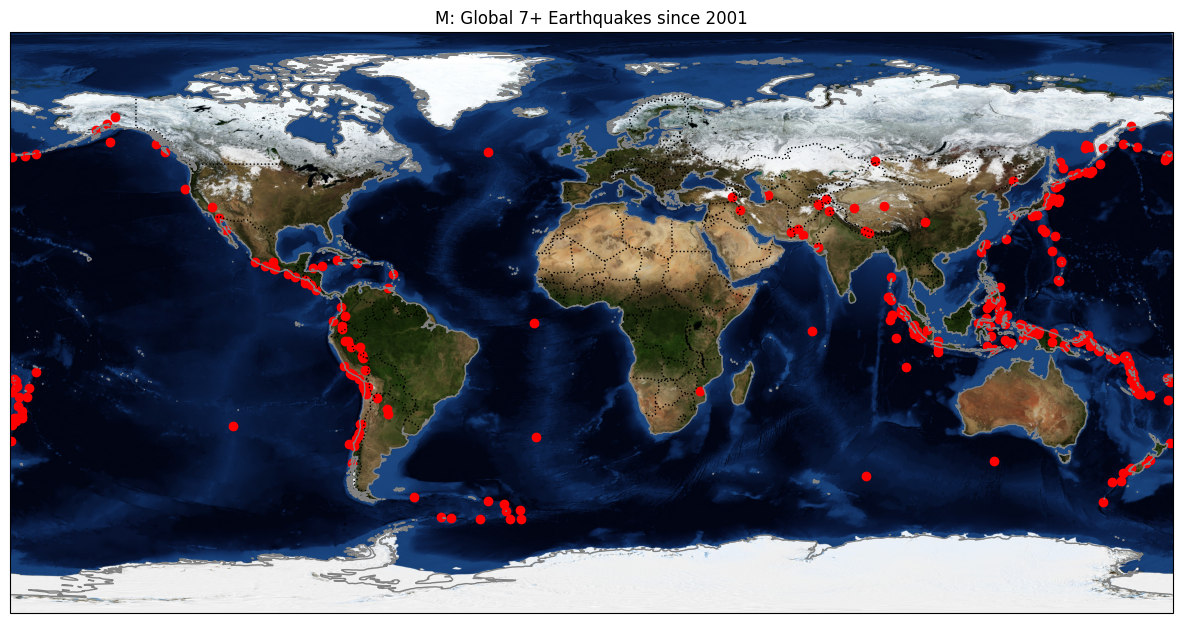

In [28]:
# >> M: MAP the 7.0 quakes on a global projection
# 1. Start a new figure. Choose a size (I used 15,8)
# 2. Start a global map with projection PlateCarree ...
#       ... so, use "ax = plt.axes()" as we did above
#
# 3. Grab/display the NASA blue marble image
#   a) wget -N the image.  Why -N?  Because this is slow!!  -N means "get only if new" ...
#        ... so if you rerun this notebook, wget won't need to "get" image AGAIN.
#   b) read into memory with imread (call the variable what you wish e.g. world)
#        ... remember what goes inside 'imread' is just the end of the name
#            from above for wget, i.e. plt.imread("world.topo...")
#   c) show with ax.imshow but inside the parentheses for imshow ... Add Options
#         i. You need option: origin='upper'
#        ii. You need option: transform=ccrs.the-projection-you-picked-earlier()
#       iii. You need option: extent= [ global values : -180,180,-90,90 ]
#        iv. Options above are separated by commas, inside parentheses
# 4. add cfeature.BORDERS and coastlines with resolution equal to 1-to-50 million...
# 5. use ax.set_global() to request a global map.
#
# 6. We could loop over ALL quakes and do ax.plot() to show a dot for each (noooo),
#      ... it is easier to use ax.scatter( ) ... to plot all quake locations at once.
#      Use your quake longitude (for the x-axis values) & latitude (for y);
#         use color='red'; and use transform=ccrs.PlateCarree()
#      If you forget transform= ... this will probably not work!
#    Scatter syntax is:  ax.scatter( x_array, y_array, options, transform=)
#
# 7. Finish with ax.set_title('M: Global 7+ Earthquakes since 2001');
#
# NOTES: you should get a Blue Marble map with red dots ... all over.
# The west coast of the Americas are lit up.

fig = plt.figure(figsize=(15, 8))
ax = plt.axes(projection=ccrs.PlateCarree())

# Read low-resolution Blue Marble image and display.
#From: https://visibleearth.nasa.gov/images/73701/may-blue-marble-next-generation-w-topography-and-bathymetry
!wget -N https://eoimages.gsfc.nasa.gov/images/imagerecords/73000/73909/world.topo.bathy.200412.3x5400x2700.jpg
world = plt.imread("world.topo.bathy.200412.3x5400x2700.jpg")
ax.imshow(world, origin='upper', transform=ccrs.PlateCarree(), extent=[-180, 180, -90, 90])

ax.add_feature(cfeature.BORDERS, linestyle=':');
ax.coastlines(color="gray",resolution='50m');
ax.set_global()

ax.scatter(quake.longitude,quake.latitude,color='red',
            transform=ccrs.PlateCarree())

ax.set_title('M: Global 7+ Earthquakes since 2001')

In [ ]:
# USE THIS cell to SAVE NOTEBOOK as HTML
# 1. LEAVE this cell COMMENTED OUT until your code works.
# 2. Still with this commented out, save notebook.ipynb file to your PC.
# 3. Upload the .ipynb file from your PC to Colab space
# 4. NOW uncomment this cell
# 5. Change filename below (after "--to html") to this notebook's name
# 6. Run JUST this cell.
# 7. Find the new .html file; Refresh the Colab file list if need be
# 8. Save (from 3-dots) the .html file to your PC.
# 9. Upload both the .ipynb and the .html files to MOODLE.
#%%shell
#jupyter nbconvert --to html  Lab05_Cartopy_solution.ipynb